# Logistic Regression: A Comprehensive Guide with Hands-on Exercises

Welcome to this comprehensive guide on Logistic Regression! In this notebook, we will delve deep into the theory, applications, and practical implementation of one of the most fundamental algorithms in machine learning for classification tasks. Despite its name, Logistic Regression is a powerful classification algorithm, not a regression algorithm. It's widely used across various industries for predicting binary outcomes, such as whether a customer will churn, if an email is spam, or if a patient has a particular disease.

This notebook is structured to provide a clear understanding of Logistic Regression, starting from its basic principles, moving through its mathematical foundations, and culminating in a hands-on implementation using Python and the scikit-learn library. We will also include several exercises to solidify your understanding and allow you to apply what you've learned.

## Table of Contents
1.  [Introduction to Logistic Regression](#1.-Introduction-to-Logistic-Regression)
2.  [The Sigmoid Function](#2.-The-Sigmoid-Function)
3.  [Understanding the Logistic Regression Model](#3.-Understanding-the-Logistic-Regression-Model)
4.  [Model Training: Cost Function and Optimization](#4.-Model-Training:-Cost-Function-and-Optimization)
5.  [Assumptions of Logistic Regression](#5.-Assumptions-of-Logistic-Regression)
6.  [Practical Implementation (using Python and Scikit-learn)](#6.-Practical-Implementation-(using-Python-and-Scikit-learn))
7.  [Model Evaluation](#7.-Model-Evaluation)
8.  [Hands-on Exercises](#8.-Hands-on-Exercises)
9.  [Conclusion](#9.-Conclusion)


## 1. Introduction to Logistic Regression

Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In machine learning, it is a classification algorithm used to predict the probability of a categorical dependent variable. The outcome is typically binary, meaning it can only take on one of two values, such as 'yes' or 'no', 'true' or 'false', 'spam' or 'not spam'.

### Classification vs. Regression
It's crucial to understand that despite the term 'regression' in its name, Logistic Regression is primarily a **classification algorithm**. Linear Regression, on the other hand, is used for predicting continuous outcomes. For example, predicting house prices (a continuous value) would be a task for Linear Regression, while predicting whether a house will sell for above or below a certain price (a binary outcome) could be a task for Logistic Regression.

Why can't we use Linear Regression for classification? If we were to use Linear Regression for a binary classification problem, the output could be any real number, which doesn't make sense for probabilities that must be between 0 and 1. Additionally, Linear Regression is sensitive to outliers and assumes a linear relationship between the independent and dependent variables, which is often not the case in classification problems.

### Real-world Applications
Logistic Regression finds extensive use in various real-world scenarios due to its simplicity, interpretability, and effectiveness for binary classification. Some common applications include:

*   **Medical Diagnosis:** Predicting the likelihood of a patient having a certain disease (e.g., diabetes, heart disease) based on symptoms, medical history, and test results [1].
*   **Credit Scoring:** Assessing the probability of a loan applicant defaulting on a loan based on their financial history and other relevant factors.
*   **Marketing:** Predicting whether a customer will purchase a product, click on an advertisement, or subscribe to a service.
*   **Spam Detection:** Classifying emails as spam or not spam based on their content and sender information.
*   **Sentiment Analysis:** Determining the sentiment (positive, negative, neutral) of a piece of text, often simplified to binary (positive/negative) for Logistic Regression.

---
**References:**
[1] Number Analytics. (2025). *10 Practical Applications of Logistic Regression in Healthcare*. Retrieved from [https://www.numberanalytics.com/blog/10-applications-logistic-regression-healthcare](https://www.numberanalytics.com/blog/10-applications-logistic-regression-healthcare)


## 2. The Sigmoid Function

At the heart of Logistic Regression lies the **sigmoid function**, also known as the **logistic function**. This function plays a crucial role in transforming the linear output of a regression model into a probability value that lies between 0 and 1. This transformation is essential because, unlike linear regression which can output any real number, classification problems require probabilities or class labels.

### Mathematical Definition and Properties
The sigmoid function is mathematically defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
Where:
*   `e` is Euler's number (approximately 2.71828)
*   `z` is the input to the function, which in the context of Logistic Regression, is the linear combination of input features and their corresponding weights (i.e., `z = w_1x_1 + w_2x_2 + ... + w_nx_n + b`, or simply `wx + b` in a simplified notation).

Key properties of the sigmoid function include:
*   **Output Range:** The output of the sigmoid function is always between 0 and 1, making it suitable for interpreting as a probability.
*   **S-shaped Curve:** The function produces an S-shaped curve, which is characteristic of cumulative distribution functions. This shape allows it to map a wide range of input values to a small range of output values.
*   **Asymptotic Behavior:** As `z` approaches positive infinity, `\sigma(z)` approaches 1. As `z` approaches negative infinity, `\sigma(z)` approaches 0.
*   **Derivative:** The derivative of the sigmoid function is easily expressed in terms of the function itself, which is beneficial for gradient-based optimization algorithms like gradient descent.

### Role in Logistic Regression
In Logistic Regression, the sigmoid function takes the output of a linear equation (which can be any real number) and squashes it into a probability. This probability represents the likelihood of the input belonging to the positive class (usually denoted as 1). For example, if the sigmoid function outputs 0.7, it means there's a 70% probability that the instance belongs to the positive class.

### Visual Representation of the Sigmoid Function
Let's visualize the sigmoid function to better understand its behavior.


<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\popson\AppData\Local\Temp\ipykernel_71544\2742258160.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(z)$')


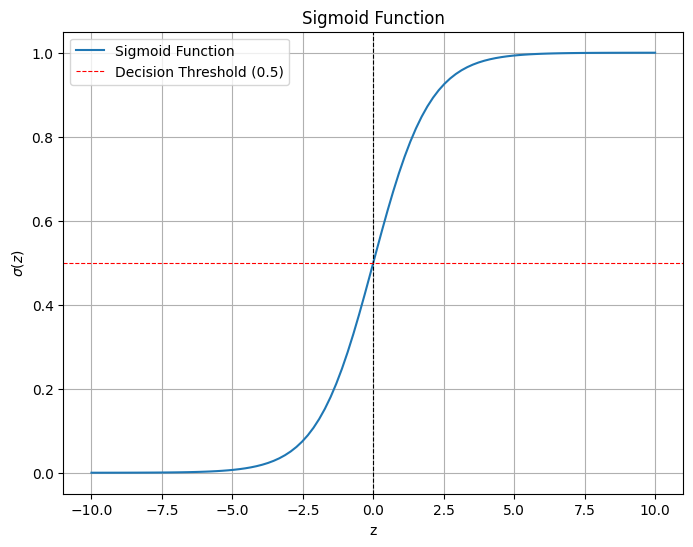

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigma_z, label='Sigmoid Function')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Sigmoid Function')
plt.grid(True)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(0.5, color='red', linestyle='--', linewidth=0.8, label='Decision Threshold (0.5)')
plt.legend()
plt.show()

The plot clearly shows how the sigmoid function maps any real input `z` to a value between 0 and 1. When `z` is 0, the output is 0.5. This point is often used as a decision threshold: if the output probability is greater than or equal to 0.5, the instance is classified as the positive class (1); otherwise, it's classified as the negative class (0).

## 3. Understanding the Logistic Regression Model

Now that we understand the sigmoid function, let's integrate it into the Logistic Regression model. The core idea is to use a linear combination of input features, similar to linear regression, and then pass this linear output through the sigmoid function to obtain a probability.

### The Logistic Regression Equation
The probability of the dependent variable `Y` being 1 (the positive class), given a set of independent variables `X`, is modeled as:
$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
$$
Where:
*   `P(Y=1|X)` is the probability that the dependent variable `Y` belongs to the positive class (1) given the input features `X`.
*   `\beta_0` is the intercept (bias term).
*   `\beta_1, \beta_2, ..., \beta_n` are the coefficients (weights) associated with each independent variable `X_1, X_2, ..., X_n`.
*   `e` is the base of the natural logarithm.

The term inside the exponent, `\beta_0 + \beta_1X_1 + ... + \beta_nX_n`, is often referred to as the **logit** or **log-odds**. It represents the linear combination of the input features. Let `z = \beta_0 + \beta_1X_1 + ... + \beta_nX_n`. Then the equation becomes `P(Y=1|X) = \frac{1}{1 + e^{-z}}`, which is exactly the sigmoid function we discussed.

### Interpretation of Coefficients (Log-Odds, Odds Ratio)
Interpreting the coefficients in Logistic Regression is slightly different from Linear Regression because the relationship between the independent variables and the probability is non-linear due to the sigmoid function. Instead, we interpret the effect of predictors on the **log-odds** or **odds ratio**.

The odds of an event are defined as the ratio of the probability of the event occurring to the probability of it not occurring: `Odds = P(Y=1|X) / P(Y=0|X) = P(Y=1|X) / (1 - P(Y=1|X))`

Taking the natural logarithm of the odds gives us the log-odds (or logit):
$$
\ln\left(\frac{P(Y=1|X)}{1 - P(Y=1|X)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n
$$
From this, we can see that the log-odds are a linear combination of the independent variables. Therefore, a one-unit increase in `X_i` is associated with an increase of `\beta_i` in the log-odds of the outcome.

To make this more intuitive, we can exponentiate the coefficients to get the **odds ratio** (`e^{\beta_i}`). The odds ratio represents the factor by which the odds of the outcome change for a one-unit increase in the predictor variable, holding all other variables constant. For example, if `e^{\beta_1} = 2`, it means that for every one-unit increase in `X_1`, the odds of `Y=1` occurring double.

### Decision Boundary
The decision boundary in Logistic Regression is the threshold that separates the different classes. Typically, a probability of 0.5 is used as the cutoff point. If the predicted probability `P(Y=1|X)` is greater than or equal to 0.5, the instance is classified as the positive class (1). If it's less than 0.5, it's classified as the negative class (0).

Mathematically, this means:
*   If `\sigma(z) \ge 0.5`, then `Y_predicted = 1`
*   If `\sigma(z) < 0.5`, then `Y_predicted = 0`

Since `\sigma(z) = 0.5` when `z = 0`, the decision boundary is defined by the equation `\beta_0 + \beta_1X_1 + ... + \beta_nX_n = 0`. This equation represents a hyperplane in the feature space. For a 2D case with two features `X_1` and `X_2`, the decision boundary is a straight line.





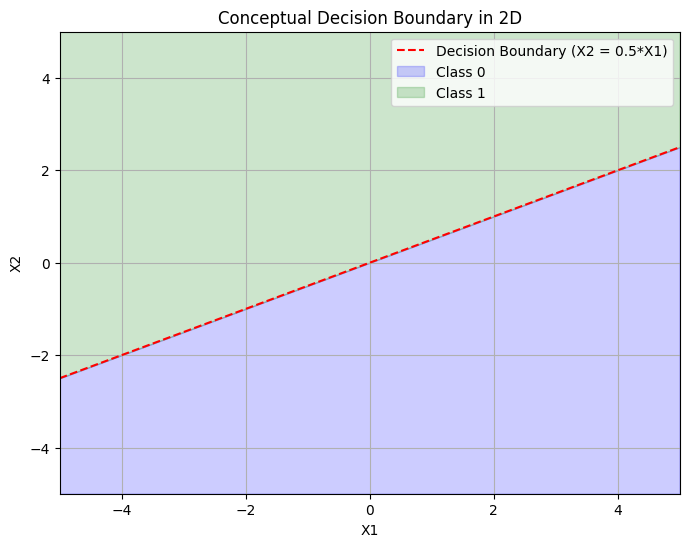

In [2]:
# Example of a decision boundary (conceptual visualization)
# This is a simplified example and does not involve actual model training.

# Let's assume a simple model: P(Y=1|X) = 1 / (1 + e^-(0.5*X1 - 1*X2 + 0))
# The decision boundary is when 0.5*X1 - 1*X2 = 0, or X2 = 0.5*X1

X1 = np.linspace(-5, 5, 100)
X2_boundary = 0.5 * X1

plt.figure(figsize=(8, 6))
plt.plot(X1, X2_boundary, color='red', linestyle='--', label='Decision Boundary (X2 = 0.5*X1)')
plt.fill_between(X1, X2_boundary, -5, color='blue', alpha=0.2, label='Class 0')
plt.fill_between(X1, X2_boundary, 5, color='green', alpha=0.2, label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Conceptual Decision Boundary in 2D')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.legend()
plt.show()


This conceptual plot illustrates how a linear decision boundary separates the feature space into regions corresponding to different classes. In a real Logistic Regression model, this boundary is learned from the data during the training process.

## 4. Model Training: Cost Function and Optimization

Training a Logistic Regression model involves finding the optimal values for the coefficients (weights) `\beta` and the intercept `\beta_0` that best fit the training data. This is achieved by minimizing a **cost function** (also known as a loss function) that quantifies the difference between the model's predicted probabilities and the actual target labels.

### Cost Function: Log Loss (Binary Cross-Entropy)
For Logistic Regression, the most commonly used cost function is the **Log Loss**, also known as **Binary Cross-Entropy**. Unlike Mean Squared Error (MSE) used in Linear Regression, Log Loss is specifically designed for classification problems and penalizes incorrect predictions more heavily, especially when the predicted probability is far from the actual label.

The Log Loss for a single training example is given by:
$$
J(	heta) = -y \log(h_\theta(x)) - (1-y) \log(1-h_\theta(x))
$$
Where:
*   `y` is the actual label (0 or 1).
*   `h_\theta(x)` is the predicted probability (output of the sigmoid function).

The total cost function for `m` training examples is the average of the individual log losses:
$$
J(	heta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))]
$$
### Intuition behind Log Loss
Let's break down the Log Loss function to understand its intuition:

*   **If `y = 1` (actual label is positive):** The second term `(1-y) \log(1-h_\theta(x))` becomes zero. The cost is `-y \log(h_\theta(x)) = -\log(h_\theta(x))`. In this case, if `h_\theta(x)` (predicted probability) is close to 1, `\log(h_\theta(x))` will be close to 0, resulting in a small cost. If `h_\theta(x)` is close to 0, `\log(h_\theta(x))` will be a large negative number, resulting in a large positive cost. This means the model is heavily penalized for predicting a low probability when the actual label is 1.

*   **If `y = 0` (actual label is negative):** The first term `y \log(h_\theta(x))` becomes zero. The cost is `-(1-y) \log(1-h_\theta(x)) = -\log(1-h_\theta(x))`. In this case, if `h_\theta(x)` (predicted probability) is close to 0, `1-h_\theta(x)` will be close to 1, and `\log(1-h_\theta(x))` will be close to 0, resulting in a small cost. If `h_\theta(x)` is close to 1, `1-h_\theta(x)` will be close to 0, and `\log(1-h_\theta(x))` will be a large negative number, resulting in a large positive cost. This means the model is heavily penalized for predicting a high probability when the actual label is 0.

In essence, Log Loss encourages the model to output high probabilities for the correct class and low probabilities for the incorrect class.

### Gradient Descent for Optimization
To minimize the Log Loss function, we use an optimization algorithm called **Gradient Descent**. Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. It works by taking steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

The update rule for each parameter `\theta_j` (which includes `\beta_0` and `\beta_i` for each feature) in Logistic Regression is:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(	heta)
$$
Where:
*   `\alpha` is the learning rate, a hyperparameter that determines the size of the steps taken during optimization.
*   `\frac{\partial}{\partial \theta_j} J(	heta)` is the partial derivative of the cost function with respect to `\theta_j`. This derivative tells us the direction of the steepest ascent of the cost function, so we move in the opposite direction to minimize it.

The partial derivative for Logistic Regression can be shown to be:
$$\frac{\partial}{\partial \theta_j} J(	heta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$
This derivative is surprisingly similar to the one for Linear Regression, but `h_\theta(x)` is now the sigmoid function output. This means that the error `(h_\theta(x^{(i)}) - y^{(i)})` is multiplied by the corresponding feature value `x_j^{(i)}` to determine how much to adjust `\theta_j`.

The Gradient Descent process involves:
1.  **Initialization:** Start with random initial values for `\beta` and `\beta_0`.
2.  **Iteration:** Repeatedly calculate the gradients and update the parameters until convergence (i.e., the cost function no longer decreases significantly, or a maximum number of iterations is reached).

There are different variants of Gradient Descent, such as Batch Gradient Descent (uses all training examples), Stochastic Gradient Descent (uses one example at a time), and Mini-Batch Gradient Descent (uses a small batch of examples). Scikit-learn's Logistic Regression implementation typically uses more advanced optimization algorithms, but the underlying principle of minimizing the Log Loss through gradient-based methods remains the same.


## 5. Assumptions of Logistic Regression

While Logistic Regression is a robust and widely used algorithm, it does come with certain assumptions. Understanding these assumptions is crucial for correctly applying the model and interpreting its results. Violating these assumptions can lead to inaccurate predictions and misleading conclusions.

### 1. Binary or Ordinal Outcome
The most fundamental assumption is that the dependent variable (outcome) must be binary (dichotomous) or ordinal. If the outcome has more than two unordered categories, multinomial logistic regression should be used. If the outcome has ordered categories, ordinal logistic regression is appropriate.

### 2. Independence of Observations
Observations (data points) should be independent of each other. This means that the outcome of one observation should not influence the outcome of another. This assumption is often violated in time-series data or clustered data where observations within a group might be correlated.

### 3. No Multicollinearity
There should be little to no multicollinearity among the independent variables. Multicollinearity occurs when two or more predictor variables in a multiple regression model are highly correlated with each other. High multicollinearity can make it difficult to interpret the individual coefficients, as it becomes hard to isolate the unique contribution of each predictor. It can also lead to unstable and unreliable coefficient estimates.

You can check for multicollinearity using techniques like Variance Inflation Factor (VIF). A common rule of thumb is that VIF values greater than 5 or 10 indicate problematic multicollinearity.

### 4. Linearity of Independent Variables and Log Odds
This is a critical assumption: the independent variables are linearly related to the log odds of the outcome. It does *not* assume a linear relationship between the independent variables and the probability itself. If this assumption is violated, the model may not accurately capture the relationship between the predictors and the outcome.

You can check this assumption by examining scatter plots of each independent variable against the log odds of the dependent variable. Alternatively, you can use Box-Tidwell transformations or include polynomial terms for continuous independent variables to account for non-linearity.

### 5. Large Sample Size
Logistic Regression, like many statistical models, performs better with a sufficiently large sample size. While there's no strict rule, a common guideline is to have at least 10 events per predictor variable. For example, if you have 5 predictor variables, you should aim for at least 50 observations in your dataset.

### 6. No Influential Outliers
The model should not have highly influential outliers. Outliers can disproportionately affect the model's coefficients and lead to biased results. You can identify influential outliers using measures like Cook's distance or leverage plots.

Addressing outliers might involve removing them (if they are data entry errors), transforming the data, or using robust regression methods.


## 6. Practical Implementation (using Python and Scikit-learn)

Now, let's put theory into practice! We will implement a Logistic Regression model using Python and the popular scikit-learn library. We will use the 'Real Estate' dataset, which we will adapt for a binary classification task.

### 6.1. Data Loading and Initial Exploration
First, we need to load the dataset and perform some initial exploration to understand its structure and content.



In [4]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced visualizations

# Load the dataset
try:
    real_estate_data = pd.read_csv("data/Real_estate.csv")
except FileNotFoundError:
    print("Error: 'data/Real_estate.csv' not found. Please ensure the dataset is in the 'data' directory.")
    # Create a dummy dataframe for demonstration if file not found
    data = {
        'No': range(1, 11),
        'X1 transaction date': np.random.uniform(2012, 2014, 10),
        'X2 house age': np.random.uniform(0, 40, 10),
        'X3 distance to the nearest MRT station': np.random.uniform(100, 5000, 10),
        'X4 number of convenience stores': np.random.randint(0, 10, 10),
        'X5 latitude': np.random.uniform(24.9, 25.1, 10),
        'X6 longitude': np.random.uniform(121.5, 121.6, 10),
        'Y house price of unit area': np.random.uniform(10, 100, 10)
    }
    real_estate_data = pd.DataFrame(data)

print("Dataset Head:")
print(real_estate_data.head())

print("Dataset Info:")
real_estate_data.info()

print("Dataset Description:")
print(real_estate_data.describe())

# Modify the dataset for classification purpose
# We will create a binary target variable: 'High_Price' (True if price is above mean, False otherwise)
mean_price = real_estate_data['Y house price of unit area'].mean()
real_estate_data_cls = real_estate_data.copy()
real_estate_data_cls['High_Price'] = real_estate_data_cls['Y house price of unit area'] > mean_price

print("Modified Dataset Head (with 'High_Price' target variable):")
print(real_estate_data_cls.head())

print("Value counts for the new target variable 'High_Price':")
print(real_estate_data_cls['High_Price'].value_counts())

# Drop the original continuous target and 'No' column as it's just an index
real_estate_data_cls = real_estate_data_cls.drop(['Y house price of unit area', 'No'], axis=1)

print("Dataset after dropping original target and 'No' column:")
print(real_estate_data_cls.head())


Dataset Head:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746  

### 6.2. Data Preprocessing

Data preprocessing is a crucial step in machine learning to prepare the raw data for model training. It involves handling missing values, encoding categorical variables, and scaling numerical features. For our Real Estate dataset, we will focus on feature scaling, as there are no obvious categorical variables or missing values based on our initial exploration.

#### Feature Scaling
Feature scaling is important for many machine learning algorithms, including Logistic Regression, especially when using optimization algorithms like Gradient Descent. Features with larger ranges can dominate the cost function, leading to slower convergence or suboptimal solutions. Scaling ensures that all features contribute equally to the distance calculations.

We will use `StandardScaler` from `sklearn.preprocessing` to standardize our numerical features. Standardization (or Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1. The formula for standardization is: `x_scaled = (x - mean) / standard_deviation`

In [6]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = real_estate_data_cls.drop('High_Price', axis=1)
y = real_estate_data_cls['High_Price']

# Identify numerical features for scaling
# Assuming all features except 'High_Price' are numerical based on the dataset description
numerical_features = X.columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X[numerical_features])

# Convert the scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

print("Scaled Features (first 5 rows):")
print(X_scaled_df.head())

print("Descriptive statistics of scaled features:")
print(X_scaled_df.describe())

Scaled Features (first 5 rows):
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0            -0.823683      1.255628                               -0.792495   
1            -0.823683      0.157086                               -0.616612   
2             1.541151     -0.387791                               -0.414015   
3             1.246435     -0.387791                               -0.414015   
4            -1.121951     -1.117223                               -0.549997   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                         2.007407     1.125430      0.448762  
1                         1.667503     0.912444      0.401139  
2                         0.307885     1.486860      0.688183  
3                         0.307885     1.486860      0.688183  
4                         0.307885     0.834188      0.592937  
Descriptive statistics of scaled features:
       X1 transaction date  X2 house age  \
count         4.

### 6.3. Splitting Data (Training and Testing Sets)

Before training our model, it's crucial to split our dataset into training and testing sets. This practice helps us evaluate the model's performance on unseen data and prevents overfitting. Overfitting occurs when a model learns the training data too well, including its noise and random fluctuations, leading to poor generalization on new data.

*   **Training Set:** Used to train the machine learning model. The model learns the patterns and relationships from this data.
*   **Testing Set:** Used to evaluate the trained model's performance. This data is kept separate from the training process to provide an unbiased assessment of how well the model generalizes to new, unseen data.

We will use `train_test_split` from `sklearn.model_selection` to perform this split. A common split ratio is 70-80% for training and 20-30% for testing.


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size: the proportion of the dataset to include in the test split
# random_state: a seed for the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (331, 6)
Shape of X_test: (83, 6)
Shape of y_train: (331,)
Shape of y_test: (83,)


### 6.4. Model Training

With our data preprocessed and split into training and testing sets, we are now ready to train our Logistic Regression model. We will use the `LogisticRegression` class from `sklearn.linear_model`.

The `LogisticRegression` class offers several parameters that can be tuned, but for now, we will use the default settings. Key parameters include:
*   `penalty`: Specifies the norm of the penalty (L1, L2, Elastic-Net, or None). L2 is the default.
*   `C`: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
*   `solver`: Algorithm to use in the optimization problem. Different solvers are suitable for different datasets and penalty types.
*   `random_state`: Used when `solver` is ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. It ensures reproducibility.



In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# We set random_state for reproducibility
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")
print("Model Coefficients:")
print(model.coef_)
print("Model Intercept:")
print(model.intercept_)

Model training complete.
Model Coefficients:
[[ 0.25737881 -0.56553588 -2.2777809   0.63362583  1.02692729 -0.07436174]]
Model Intercept:
[-0.51630777]



The `model.coef_` attribute gives us the learned coefficients for each feature, and `model.intercept_` gives us the bias term. These are the parameters that the model has optimized to minimize the Log Loss.

### 6.5. Making Predictions
Once the model is trained, we can use it to make predictions on new, unseen data, specifically our test set. We can predict both the class labels (0 or 1) and the probabilities of belonging to each class.

*   `model.predict(X_test)`: Predicts the class label for each instance in `X_test` based on the learned decision boundary (default threshold of 0.5).
*   `model.predict_proba(X_test)`: Predicts the probability of each instance belonging to each class. The output is an array where the first column is the probability of the negative class (0) and the second column is the probability of the positive class (1).




In [9]:
# Predict class labels on the test set
y_pred = model.predict(X_test)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

print("First 10 predicted class labels:")
print(y_pred[:10])

print("First 10 predicted probabilities (for positive class):")
print(y_pred_proba[:10])

print("First 10 actual labels from test set:")
print(y_test.values[:10])

First 10 predicted class labels:
[ True  True  True  True False  True  True  True False  True]
First 10 predicted probabilities (for positive class):
[0.88426034 0.62130203 0.83092286 0.71306473 0.02447176 0.84769981
 0.88293425 0.90969642 0.01698445 0.97530459]
First 10 actual labels from test set:
[ True  True  True False False False  True  True False  True]


## 7. Model Evaluation

After training a Logistic Regression model and making predictions, the next crucial step is to evaluate its performance. Evaluation metrics help us understand how well our model is performing and whether it is suitable for the problem at hand. For classification problems, accuracy alone is often not sufficient, especially with imbalanced datasets.

### 7.1. Classification Metrics
We will explore several common classification metrics:

#### Accuracy
Accuracy is the most straightforward metric, representing the proportion of correctly classified instances (both true positives and true negatives) out of the total instances.
$$
Accuracy = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$
While easy to understand, accuracy can be misleading for imbalanced datasets. For example, if 95% of your data belongs to one class, a model that always predicts that class would have 95% accuracy, but it would be useless.

#### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

| | Predicted Negative | Predicted Positive |
|---|---|---|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |

*   **True Positive (TP):** Correctly predicted positive class.
*   **True Negative (TN):** Correctly predicted negative class.
*   **False Positive (FP):** Incorrectly predicted positive class (Type I error). Also known as a "false alarm".
*   **False Negative (FN):** Incorrectly predicted negative class (Type II error). Also known as a "miss".

#### Precision, Recall, and F1-Score
These metrics provide a more nuanced view of model performance, especially useful when dealing with imbalanced datasets or when the cost of different types of errors varies.

*   **Precision:** The proportion of correctly predicted positive observations among all predicted positive observations. It answers: "Of all instances predicted as positive, how many were actually positive?"
$$
Precision = \frac{TP}{TP + FP}
$$
*   **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive observations among all actual positive observations. It answers: "Of all actual positive instances, how many did the model correctly identify?"
$$
Recall = \frac{TP}{TP + FN}$$
*   **F1-Score:** The harmonic mean of Precision and Recall. It provides a single metric that balances both precision and recall. It is particularly useful when you need to seek a balance between Precision and Recall and there is an uneven class distribution.
$$
F1-Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8193
Confusion Matrix:
[[36 12]
 [ 3 32]]
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.75      0.83        48
        True       0.73      0.91      0.81        35

    accuracy                           0.82        83
   macro avg       0.83      0.83      0.82        83
weighted avg       0.84      0.82      0.82        83



### 7.2. ROC Curve and AUC
The **Receiver Operating Characteristic (ROC) curve** is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR, also known as Recall) against the False Positive Rate (FPR) at various threshold settings.

*   **True Positive Rate (TPR) / Recall:** `TPR = TP / (TP + FN)`
*   **False Positive Rate (FPR):** `FPR = FP / (FP + TN)`

The **Area Under the Curve (AUC)** is the area under the ROC curve. It provides an aggregate measure of performance across all possible classification thresholds. AUC ranges from 0 to 1. A model with an AUC of 0.5 performs no better than random chance, while a model with an AUC of 1.0 has perfect classification ability.

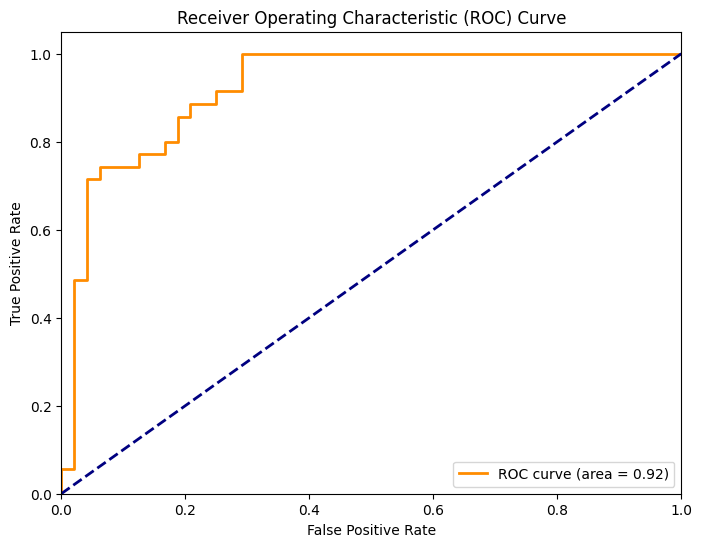

In [13]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve and AUC are particularly useful for evaluating models when the classes are imbalanced, as they provide a comprehensive measure of the model's ability to distinguish between classes across various thresholds.

## 8. Hands-on Exercises

Now it's your turn to apply what you've learned! These exercises will guide you through building and evaluating Logistic Regression models on different datasets, and help you deepen your understanding of the concepts discussed.

### Exercise 1: Data Exploration and Preprocessing (Iris Dataset)
The Iris dataset is a classic and simple dataset often used for classification tasks. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are not linearly separable from each other. For this exercise, we will simplify it to a binary classification problem.

**Task:**
1.  Load the Iris dataset from `sklearn.datasets`.
2.  Convert it into a binary classification problem. For example, classify 'setosa' (class 0) vs. 'versicolor' and 'virginica' (classes 1 and 2 combined into a single 'non-setosa' class).
3.  Perform initial data exploration: display the first few rows, check data types, and look for missing values.
4.  Separate features (X) and the new binary target (y).
5.  Apply `StandardScaler` to the features.



In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Load the Iris dataset
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

# 2. Convert to a binary classification problem: Setosa (0) vs. Non-Setosa (1)
y_iris_binary = (y_iris != 0).astype(int)

# 3. Perform initial data exploration
print("Iris Dataset Head:")
print(X_iris.head())
print("Iris Target (Binary) Head:")
print(y_iris_binary[:5])
print("Iris Dataset Info:")
X_iris.info()
print("Missing values in Iris features:")
print(X_iris.isnull().sum())

# 4. Separate features (X) and the new binary target (y) - already done above

# 5. Apply StandardScaler to the features
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)
X_iris_scaled_df = pd.DataFrame(X_iris_scaled, columns=iris.feature_names)

print("Scaled Iris Features (first 5 rows):")
print(X_iris_scaled_df.head())


Iris Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Iris Target (Binary) Head:
[0 0 0 0 0]
Iris Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
Missing values in Iris features:
se



### Exercise 2: Building and Evaluating a Logistic Regression Model (Iris Dataset)
**Task:**
1.  Split the scaled Iris dataset (`X_iris_scaled_df`, `y_iris_binary`) into training and testing sets (e.g., 80% train, 20% test, `random_state=42`).
2.  Train a `LogisticRegression` model on the training data.
3.  Make predictions on the test set.
4.  Evaluate the model using:
    *   Accuracy score
    *   Confusion Matrix
    *   Classification Report (Precision, Recall, F1-Score)
    *   ROC Curve and AUC

Iris Model Accuracy:
Accuracy: 1.0000
Iris Model Confusion Matrix:
[[10  0]
 [ 0 20]]
Iris Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



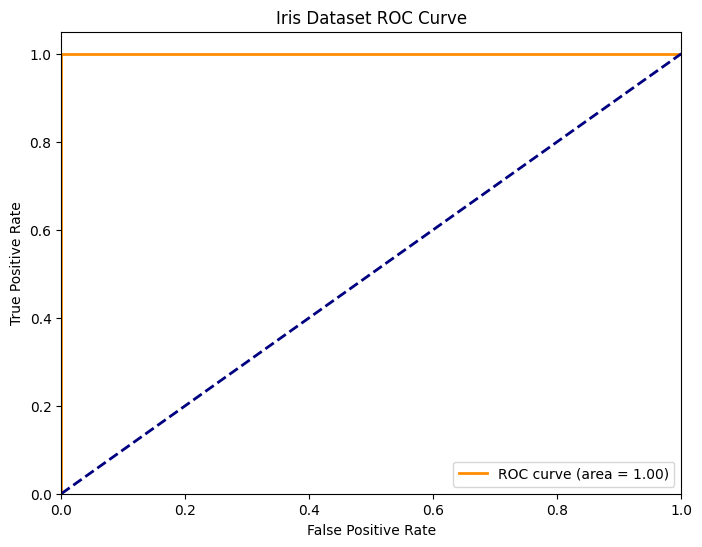

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Split the scaled Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris_scaled_df, y_iris_binary, test_size=0.2, random_state=42)

# 2. Train a Logistic Regression model
model_iris = LogisticRegression(random_state=42)
model_iris.fit(X_train_iris, y_train_iris)

# 3. Make predictions on the test set
y_pred_iris = model_iris.predict(X_test_iris)
y_pred_proba_iris = model_iris.predict_proba(X_test_iris)[:, 1]

# 4. Evaluate the model
print("Iris Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")

print("Iris Model Confusion Matrix:")
print(confusion_matrix(y_test_iris, y_pred_iris))

print("Iris Model Classification Report:")
print(classification_report(y_test_iris, y_pred_iris))

# Plot ROC Curve
fpr_iris, tpr_iris, thresholds_iris = roc_curve(y_test_iris, y_pred_proba_iris)
roc_auc_iris = auc(fpr_iris, tpr_iris)

plt.figure(figsize=(8, 6))
plt.plot(fpr_iris, tpr_iris, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_iris)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Iris Dataset ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Exercise 3: Interpreting Model Coefficients (Real Estate Dataset)
**Task:**
1.  Retrieve the coefficients and intercept from the `model` trained on the Real Estate dataset (from section 6.4).
2.  Map the coefficients to their corresponding feature names.
3.  Calculate the odds ratios for each feature (`e^coefficient`).
4.  Interpret the meaning of at least two coefficients/odds ratios in the context of the Real Estate dataset.

In [17]:
# 1. Retrieve coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# 2. Map coefficients to feature names
feature_names = X.columns # X was the original unscaled features DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("Model Coefficients and Intercept (Real Estate Dataset):")
print(coef_df)
print(f"Intercept: {intercept:.4f}")

# 3. Calculate odds ratios
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])
print("Model Coefficients and Odds Ratios (Real Estate Dataset):")
print(coef_df.sort_values(by='Odds Ratio', ascending=False))

# 4. Interpretation (Example - you should add your own interpretations based on the output)
print("Interpretation Examples:")
print("  - For 'X4 number of convenience stores': An odds ratio greater than 1 suggests that an increase in the number of convenience stores is associated with higher odds of a house having a 'High_Price', holding other factors constant.")
print("  - For 'X3 distance to the nearest MRT station': An odds ratio less than 1 suggests that an increase in distance to the nearest MRT station is associated with lower odds of a house having a 'High_Price', holding other factors constant.")

Model Coefficients and Intercept (Real Estate Dataset):
                                  Feature  Coefficient
0                     X1 transaction date     0.257379
1                            X2 house age    -0.565536
2  X3 distance to the nearest MRT station    -2.277781
3         X4 number of convenience stores     0.633626
4                             X5 latitude     1.026927
5                            X6 longitude    -0.074362
Intercept: -0.5163
Model Coefficients and Odds Ratios (Real Estate Dataset):
                                  Feature  Coefficient  Odds Ratio
4                             X5 latitude     1.026927    2.792472
3         X4 number of convenience stores     0.633626    1.884431
0                     X1 transaction date     0.257379    1.293535
5                            X6 longitude    -0.074362    0.928336
1                            X2 house age    -0.565536    0.568056
2  X3 distance to the nearest MRT station    -2.277781    0.102511
Interpretatio

### Exercise 4: Hyperparameter Tuning (Optional/Advanced - Breast Cancer Wisconsin Dataset)
The Breast Cancer Wisconsin (Diagnostic) dataset is a good dataset for binary classification. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It classifies whether the tumor is malignant or benign.

**Task:**
1.  Load the Breast Cancer Wisconsin dataset from `sklearn.datasets`.
2.  Split the data into training and testing sets and scale the features.
3.  Experiment with the `C` parameter (inverse of regularization strength) in `LogisticRegression`. Train models with different `C` values (e.g., 0.01, 0.1, 1, 10, 100).
4.  Evaluate the performance (e.g., accuracy, F1-score) of each model and observe how `C` affects overfitting/underfitting.






Breast Cancer Dataset Head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  wor

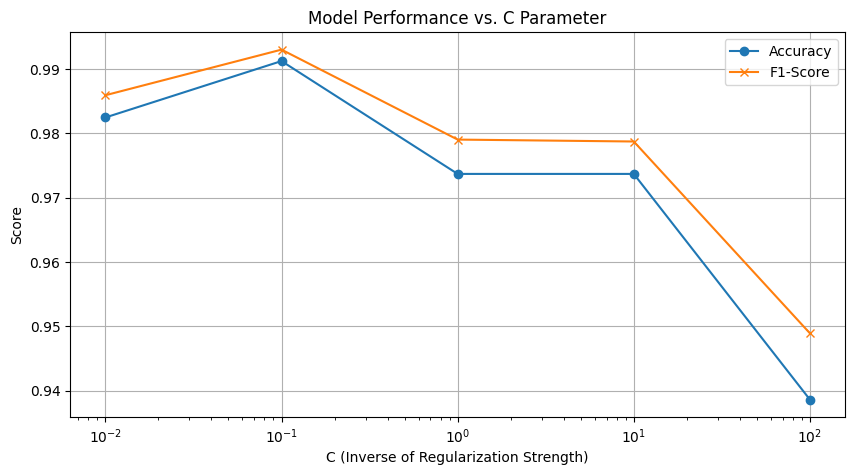

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 1. Load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target

print("Breast Cancer Dataset Head:")
print(X_cancer.head())
print("Breast Cancer Target Value Counts:")
print(pd.Series(y_cancer).value_counts())

# 2. Split and scale the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# 3. Experiment with different C values
C_values = [0.01, 0.1, 1, 10, 100]
results = {"C": [], "Accuracy": [], "F1-Score": []}

for C in C_values:
    model_cancer = LogisticRegression(C=C, random_state=42, solver='liblinear') # liblinear is good for small datasets and L1/L2 penalties
    model_cancer.fit(X_train_cancer_scaled, y_train_cancer)
    y_pred_cancer = model_cancer.predict(X_test_cancer_scaled)
    
    accuracy = accuracy_score(y_test_cancer, y_pred_cancer)
    f1 = f1_score(y_test_cancer, y_pred_cancer)
    
    results["C"].append(C)
    results["Accuracy"].append(accuracy)
    results["F1-Score"].append(f1)

results_df = pd.DataFrame(results)
print("Hyperparameter Tuning Results (Breast Cancer Dataset):")
print(results_df)

# You can further visualize these results to see the trend
plt.figure(figsize=(10, 5))
plt.plot(results_df['C'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['C'], results_df['F1-Score'], marker='x', label='F1-Score')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Score')
plt.title('Model Performance vs. C Parameter')
plt.legend()
plt.grid(True)
plt.show()

## 9. Conclusion

Congratulations! You have now completed a comprehensive journey through Logistic Regression, from its theoretical underpinnings to practical implementation and evaluation. We covered:

*   The fundamental concept of Logistic Regression as a **classification algorithm**.
*   The pivotal role of the **sigmoid function** in transforming linear outputs into probabilities.
*   The interpretation of model **coefficients** and **odds ratios**.
*   The importance of the **decision boundary** in classifying instances.
*   The mechanism of **Log Loss** as the cost function and **Gradient Descent** for optimization.
*   Key **assumptions** of Logistic Regression and their implications.
*   A step-by-step **practical implementation** using Python and scikit-learn, including data preprocessing, model training, and prediction.
*   Various **evaluation metrics** such as accuracy, confusion matrix, precision, recall, F1-score, and the ROC curve with AUC.
*   **Hands-on exercises** to solidify your understanding and build practical skills.

Logistic Regression remains a powerful and widely used algorithm due to its simplicity, interpretability, and efficiency, especially for binary classification tasks. While more complex algorithms exist, Logistic Regression often serves as a strong baseline and is invaluable for understanding the foundational concepts of classification.

### When to use Logistic Regression?
Consider using Logistic Regression when:
*   You have a **binary (or ordinal) classification problem**.
*   You need a **simple and interpretable model**.
*   You want to understand the **relationship between predictors and the probability of the outcome** (e.g., through odds ratios).
*   Your data meets (or can be transformed to meet) the model's **assumptions**.
*   You need a **fast and efficient** model for large datasets.

### Further Learning Resources
To continue your learning journey, consider exploring:
*   **Regularization techniques** (L1, L2) in more detail to prevent overfitting.
*   **Multinomial Logistic Regression** for multi-class classification problems.
*   **Feature Engineering** to create more informative features for your model.
*   **Advanced optimization algorithms** beyond basic Gradient Descent.
*   Other classification algorithms like Support Vector Machines (SVMs), Decision Trees, Random Forests, and Neural Networks.

Keep practicing and experimenting with different datasets to master your machine learning skills!
